In [36]:
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
data_path = '../data/raw/Churn.csv'
df = pd.read_csv(data_path)

In [38]:
# Display basic information about the DataFrame
print()
print("DataFrame Information:")
print()
print(df.info())
print()
print("\nDataFrame Description:")
print()
print(df.describe(include='all'))
print()
print("\nFirst 5 rows of the DataFrame:")
print()
print(df.head())


DataFrame Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB
None


DataFrame Description:

          RowNumber    CustomerId Surn

# Structure Analysis

- 10,000 rows, 14 columns;
- No columns with excessive NaN values—except Tenure (~9% missing);
- Surname, RowNumber, and CustomerId have no clear predictive value (can be discarded).
- Exited is the target variable.

In [39]:
# Null values analysis
print(df['Tenure'].isnull().sum())

#Exploring the relationship between the null values in 'Tenure' and the target variable 'Exited'
print("\nNull values in 'Tenure' by 'Exited':")
print(df.groupby('Exited')['Tenure'].apply(lambda x: x.isnull().sum()))
print()
print("Crosstab of 'Tenure' null values and 'Exited':")
print(pd.crosstab(df['Tenure'].isna(), df['Exited'], normalize='index'))
print()
print("Crosstab of 'Tenure' null values and 'Geography':")
print(pd.crosstab(df['Tenure'].isna(), df['Geography'], normalize='index'))
print()
print("Crosstab of 'Tenure' null values and 'Gender':")
print(pd.crosstab(df['Tenure'].isna(), df['Gender'], normalize='index'))


909

Null values in 'Tenure' by 'Exited':
Exited
0    726
1    183
Name: Tenure, dtype: int64

Crosstab of 'Tenure' null values and 'Exited':
Exited         0         1
Tenure                    
False   0.796062  0.203938
True    0.798680  0.201320

Crosstab of 'Tenure' null values and 'Geography':
Geography    France   Germany     Spain
Tenure                                 
False      0.500495  0.252227  0.247278
True       0.510451  0.237624  0.251925

Crosstab of 'Tenure' null values and 'Gender':
Gender    Female      Male
Tenure                    
False   0.452865  0.547135
True    0.468647  0.531353


In [40]:
#null values ​​in Tenure appear to be MCAR
# Filling missing values in 'Tenure' with the median
median_tenure = df['Tenure'].median()
df['Tenure'].fillna(median_tenure, inplace=True)



Value counts of 'Exited':
Exited
0    0.7963
1    0.2037
Name: proportion, dtype: float64


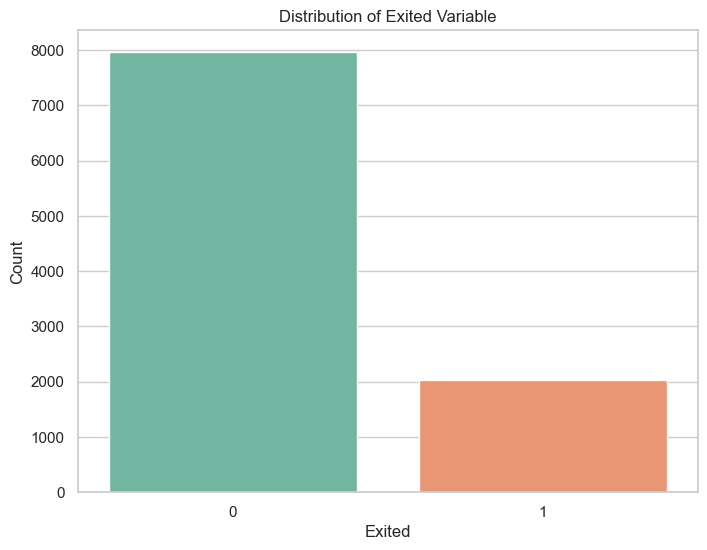

In [49]:
#analysis of the 'Exited' variable
print("\nValue counts of 'Exited':")
print(df['Exited'].value_counts(normalize=True))
# Plotting the distribution of the 'Exited' variable
plt.figure(figsize=(8, 6))
sns.countplot(x='Exited', data=df, palette='Set2')
plt.title('Distribution of Exited Variable')        
plt.xlabel('Exited')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.savefig('../reports/fig_exited_distribution.png', bbox_inches='tight')
plt.show()

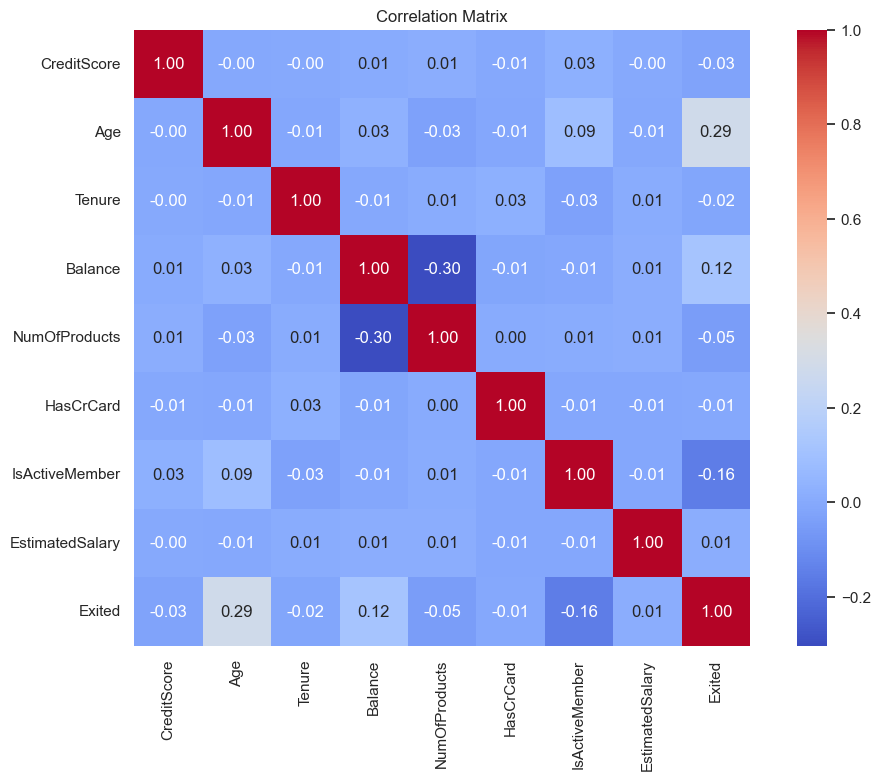

In [50]:
#Correlation analysis
plt.figure(figsize=(12, 8))
numeric_df = df.select_dtypes(include='number')
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.savefig('../reports/fig_correlation_matrix_eda.png', bbox_inches='tight')
plt.show()

In [27]:
print()
print("Gender vs Exited")
print()
print(pd.crosstab(df['Gender'], df['Exited'], normalize='index'))
print()
print("Geography vs Exited")
print()
print(pd.crosstab(df['Geography'], df['Exited'], normalize='index'))


Gender vs Exited

Exited         0         1
Gender                    
Female  0.749285  0.250715
Male    0.835441  0.164559

Geography vs Exited

Exited            0         1
Geography                    
France     0.838452  0.161548
Germany    0.675568  0.324432
Spain      0.833266  0.166734


# Final Analysis Before Feature Engineering
- The Exited variable is unbalanced (79.6% x 20.4%). Therefore, metrics such as F1-score and AUC-ROC have more value than accuracy, for example;
- Age showed a weak correlation in relation to Exited (.29). However, it may show improvement after Feature Engineering;
- Balance, CreditScore, Tenure, EstimatedSalary, and HasCrCard present weak or nonexistent correlations. However, they can be combined with other variables in the model;
- IsActiveMember has a negative correlation (-.16). That is, inactive customers are more likely to leave;
- Tenure presented missing values ​​with no visible pattern, and the churn rate between records with and without a value was virtually the same. The strategy applied was to fill in missing values ​​with the median;
- Gender influences the probability of leaving (women 25.1%);
- German customers have a higher churn rate than other countries;
- The RowNumber column is only an index and does not contribute information to the model — it will be discarded;
- CustomerId and Surname are also discarded, as they are unique identifiers and have no direct predictive value;

In [48]:
# Verifica colunas existentes antes de tentar excluir
cols_to_drop = ['RowNumber', 'CustomerId', 'Surname']
df.drop(columns=[col for col in cols_to_drop if col in df.columns], inplace=True)

# Cria diretório se não existir
os.makedirs('../data/interim', exist_ok=True)

# Salva o DataFrame
output_path = '../data/interim/churn_cleaned.csv'
df.to_csv(output_path, index=False)
print(f"Arquivo salvo com sucesso em: {output_path}")
print(df.head())
print(df.info())

Arquivo salvo com sucesso em: ../data/interim/churn_cleaned.csv
   CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42     2.0       0.00              1   
1          608     Spain  Female   41     1.0   83807.86              1   
2          502    France  Female   42     8.0  159660.80              3   
3          699    France  Female   39     1.0       0.00              2   
4          850     Spain  Female   43     2.0  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dty